# Affinity Propagation

Assumptions 
* The data is evenly sampled.

* The data is in similarity form (the greater the variance, the grater the similarity among clusters)

Parameter selection:
* max_iter: number of iterations. Chosen a value to reach convergence (with those iterations the clusters don't change)

* preference (array-like): Preferences for each point - points with larger values of preferences are more likely to be chosen as exemplars. The number of exemplars, ie of clusters, is influenced by the input preferences value. If the preferences are not passed as arguments, they will be set to the median of the input similarities

* damping:  the extent to which the current value is maintained relative to incoming values.

Although these parameters can be changed and have a significant impact, they are left by default as the algorithms for their determination complicate too much the computations and severely extend the time they take.

Returns (attributes):
* cluster_centers: Indices of cluster centers

* cluster_centers: Cluster centers 

* labels_: Labels of each point

* affinity_matrix: Stores the affinity matrix used in fit.

* n_iter: Number of iterations taken to converge

In [1]:
%matplotlib inline
import math
import os
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns;
sns.set()
from collections import defaultdict
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
plt.rcParams["figure.figsize"] = (12,7)

C:\Users\lalaj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
from read_clustering.variant_call import VariantCall
path = 'C:/Users/lalaj/PycharmProjects/untitled3/read_clustering/tests/test_files/native_cbf5_gal.csv'
native = VariantCall(path)

In [6]:
list_18 = native.get_subunit_data('RDN18-1')
list_25 = native.get_subunit_data('RDN25-1')

Plotting the data with default parameters:

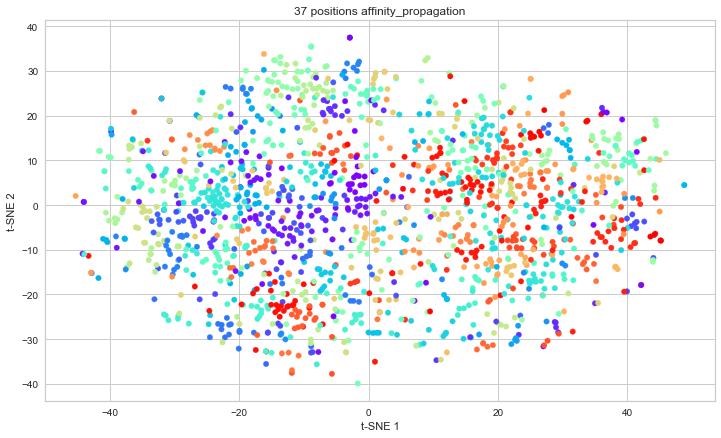

In [12]:
native.plot_tSNE_reads_covering_positions_data(list_18, 'affinity_propagation') 

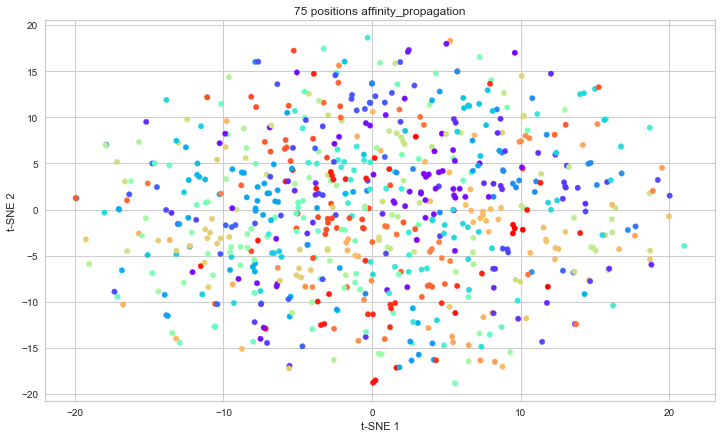

In [13]:
native.plot_tSNE_reads_covering_positions_data(list_25, 'affinity_propagation') 